# **1. Perkenalan Dataset**


Menggunakan dataset student perfomance factor yang didapatkan dari kaggle berikut isi kolom dari dataset berikut:

- Hours_Studied: Jumlah jam belajar per minggu.

- Attendance: Persentase kehadiran di kelas.

- Parental_Involvement: Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi).

- Access_to_Resources: Ketersediaan sumber daya pendidikan (Rendah, Sedang, Tinggi).

- Extracurricular_Activities: Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak).

- Sleep_Hours: Rata-rata jumlah jam tidur setiap malam.

- Previous_Scores: Nilai ujian sebelumnya.

- Motivation_Level: Tingkat motivasi siswa (Rendah, Sedang, Tinggi).

- Internet_Access: Ketersediaan akses internet (Ya, Tidak).

- Tutoring_Sessions: Jumlah sesi bimbingan belajar per bulan.

- Family_Income: Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi).

- Teacher_Quality: Kualitas pengajar (Rendah, Sedang, Tinggi).

- School_Type: Jenis sekolah yang dihadiri (Negeri, Swasta).

- Peer_Influence: Pengaruh teman sebaya terhadap prestasi akademik (Positif, Netral, Negatif).

- Physical_Activity: Rata-rata jumlah jam aktivitas fisik per minggu.

- Learning_Disabilities: Adanya gangguan belajar (Ya, Tidak).

- Parental_Education_Level: Tingkat pendidikan tertinggi orang tua (SMA,Perguruan Tinggi, Pascasarjana).

- Distance_from_Home: Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh).

- Gender: Jenis kelamin siswa (Laki-laki, Perempuan).

- Exam_Score: Skor ujian akhir.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
student_df=pd.read_csv('/content/drive/MyDrive/SPK/DBS/StudentPerformanceFactors.csv')
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print(f'Jumlah Baris dan Kolom: {student_df.shape}')
print('Tipe Data Tiap Kolom:')
print(student_df.dtypes)

Jumlah Baris dan Kolom: (6607, 20)
Tipe Data Tiap Kolom:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [ ]:
student_df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
print("Jumlah duplikasi: ", student_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
student_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


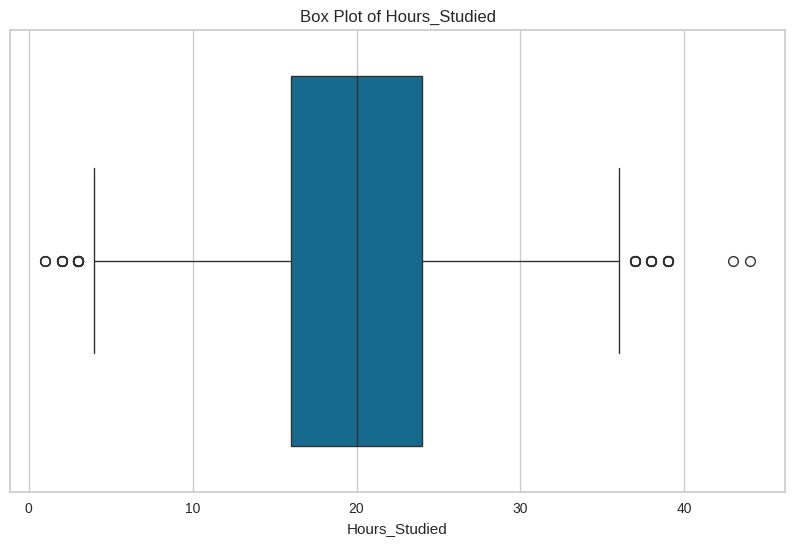

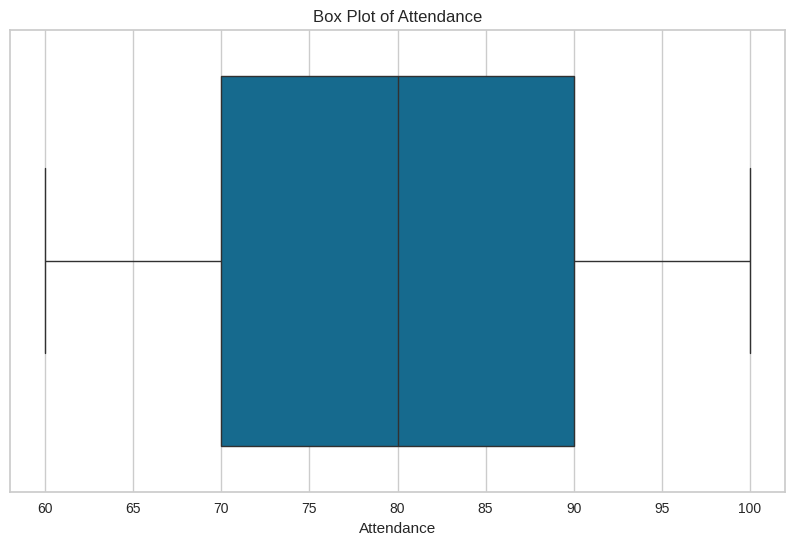

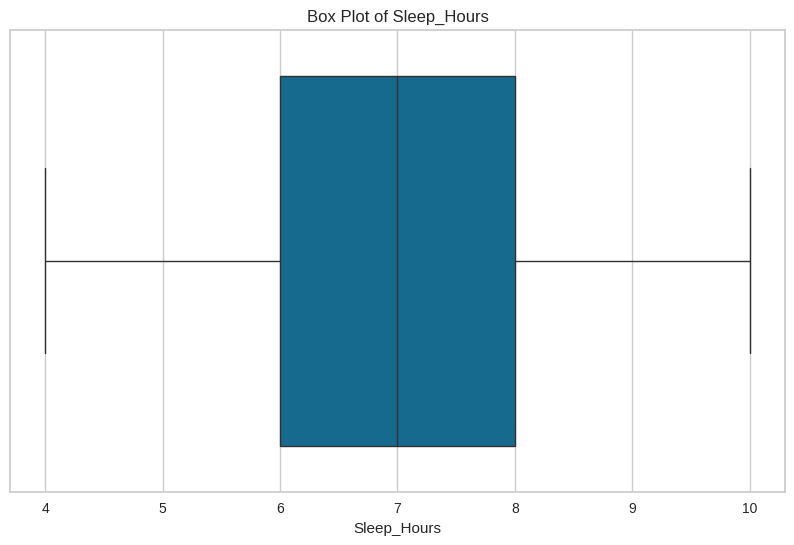

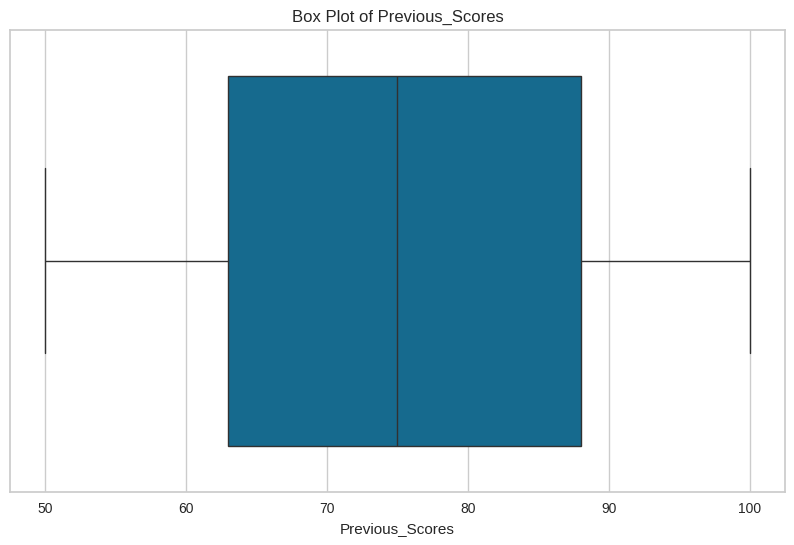

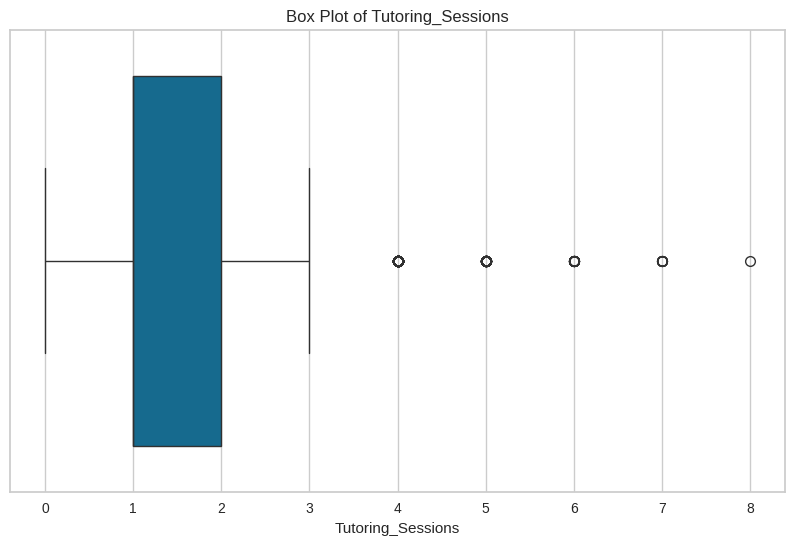

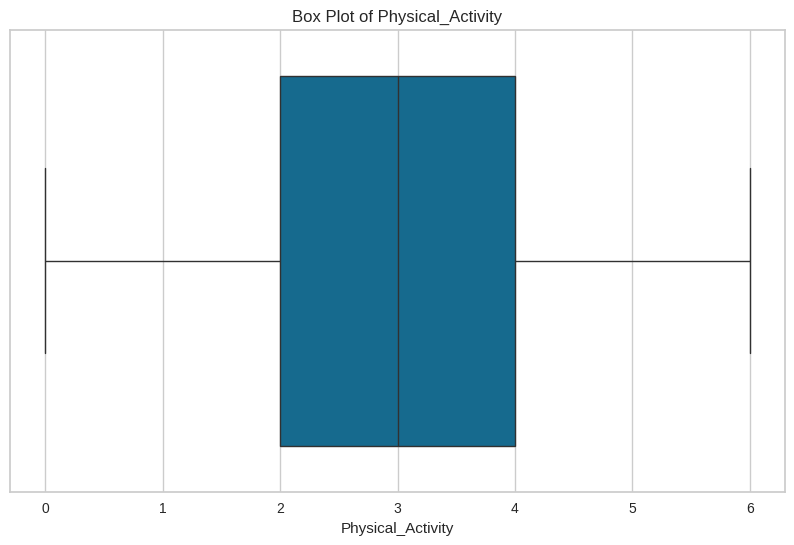

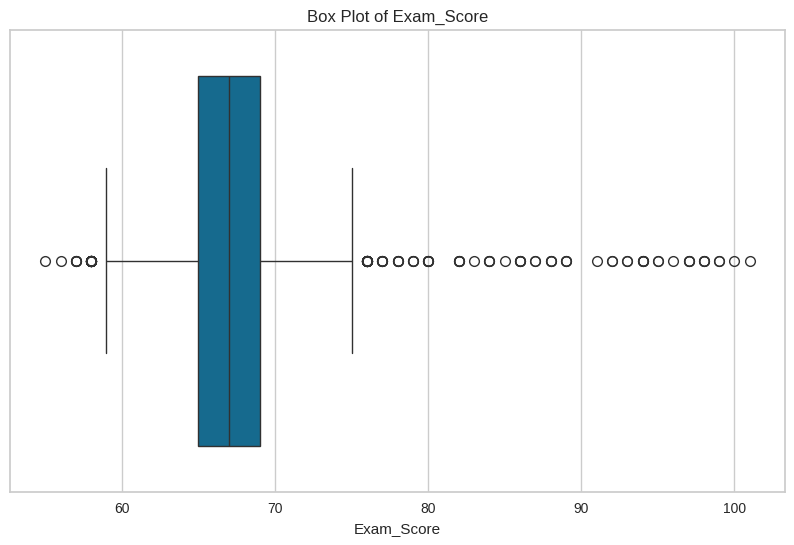

In [ ]:
numeric_features = student_df.select_dtypes(include=['number']).columns.tolist()

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=student_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
cat_features = student_df.select_dtypes(include='O')

columns = 2
rows = (len(cat_features.columns) + 1) // columns

base_color = '#A3C1DA'
highlight_color = '#34456E'
fig = sp.make_subplots(rows=rows, cols=columns, subplot_titles=[feature for feature in cat_features.columns])

for idx, feature in enumerate(cat_features.columns):
    current_row = (idx // columns) + 1
    current_col = (idx % columns) + 1

    count_data = cat_features[feature].value_counts().reset_index()
    count_data.columns = [feature, 'jumlah']

    # Memberikan warna gelap hanya untuk nilai tertinggi
    colors = [highlight_color if i == 0 else base_color for i in range(len(count_data))]

    fig.add_trace(
        go.Bar(x=count_data[feature], y=count_data['jumlah'], name=feature,
               marker_color=colors, text=count_data['jumlah'], textposition='auto'),
        row=current_row, col=current_col
    )

fig.update_layout(
    title_text="Distribusi Setiap Fitur Kategorikal dengan Highlight pada Nilai Tertinggi",
    height=2500, width=800,
    showlegend=False,
    template='plotly_white'
)

fig.show()

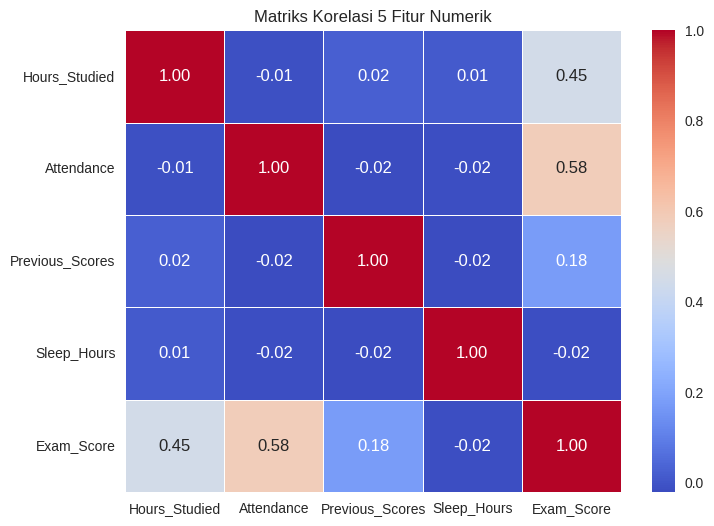

In [ ]:
selected_features = ["Hours_Studied", "Attendance", "Previous_Scores", "Sleep_Hours", "Exam_Score"]

# Matriks korelasi
corr_matrix = student_df[selected_features].corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi 5 Fitur Numerik")
plt.show()

**insight** :
- Terdapat missing value Teacher_Quality	78, Parental_Education_Level	90, Distance_from_Home	67
- Tidak ada duplikasi
- Terdapat outliner pada exam_score terdapat nilai yang 101



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
student_df.dropna(inplace=True)

In [ ]:
student_df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# 1. Binary Encoding (menggunakan One-Hot Encoding dengan drop_first=True)
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities',
               'Gender', 'School_Type']
student_df = pd.get_dummies(student_df, columns=binary_cols, drop_first=True, dtype=int)

# 2. Label Encoding (lebih dari 2 kategori menjadi One-Hot Encoding)
multi_cat_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                  'Family_Income', 'Teacher_Quality', 'Peer_Influence',
                  'Parental_Education_Level', 'Distance_from_Home']
student_df = pd.get_dummies(student_df, columns=multi_cat_cols, drop_first=False, dtype=int)

# Menampilkan hasil encoding
student_df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,...,Teacher_Quality_Medium,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,7,73,0,3,67,0,1,0,...,1,0,0,1,0,1,0,0,0,1
1,19,64,8,59,2,4,61,0,1,0,...,1,1,0,0,1,0,0,0,1,0
2,24,98,7,91,2,4,74,1,1,0,...,1,0,1,0,0,0,1,0,0,1
3,29,89,8,98,1,4,71,1,1,0,...,1,1,0,0,0,1,0,0,1,0
4,19,92,6,65,3,4,70,1,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6603,23,76,8,81,3,2,69,0,1,0,...,0,0,0,1,0,1,0,0,0,1
6604,20,90,6,65,3,2,68,1,1,0,...,1,1,0,0,0,0,1,0,0,1
6605,10,86,6,91,2,3,68,1,1,0,...,1,0,0,1,0,1,0,1,0,0


In [ ]:
student_df['Exam_Score'] = np.where(student_df['Exam_Score'] > 100, 100, student_df['Exam_Score'])

# Verifikasi hasil
print(student_df['Exam_Score'].describe())

count    6378.000000
mean       67.251960
std         3.912884
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64


**insight**:
- menghapus duplikat value dari dataset
- lalu merubah nilai outlier yang 101 menjadi 100
- Membuat encoding data kategorikal dengan nilai 0,1 untuk yang kategorikalnya 2 sedangkan data yang kategorikalnya ada 3 dibuat nilai 0,1,2

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

      0   1   2   3   4   5   6   7   8   9   ...  25  26  27  28  29  30  31  \
0     23  84   7  73   0   3  67   0   1   0  ...   0   1   0   0   1   0   1   
1     19  64   8  59   2   4  61   0   1   0  ...   0   1   1   0   0   1   0   
2     24  98   7  91   2   4  74   1   1   0  ...   0   1   0   1   0   0   0   
3     29  89   8  98   1   4  71   1   1   0  ...   0   1   1   0   0   0   1   
4     19  92   6  65   3   4  70   1   1   0  ...   0   0   0   1   0   1   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
6373  25  69   7  76   1   2  68   0   1   0  ...   0   1   0   0   1   0   1   
6374  23  76   8  81   3   2  69   0   1   0  ...   0   0   0   0   1   0   1   
6375  20  90   6  65   3   2  68   1   1   0  ...   0   1   1   0   0   0   0   
6376  10  86   6  91   2   3  68   1   1   0  ...   0   1   0   0   1   0   1   
6377  15  67   9  94   0   4  64   1   1   0  ...   0   1   0   0   1   0   0   

      32  33  34  
0      0

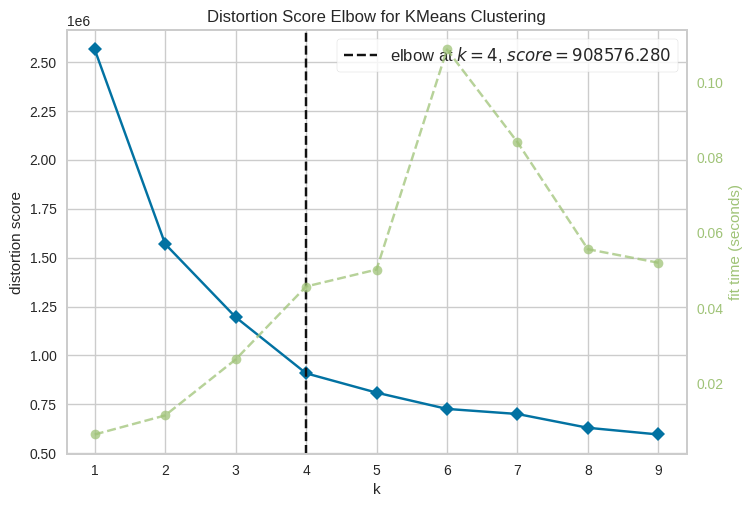

Jumlah cluster optimal: 4


In [ ]:


# Asumsikan data sudah dibaca dalam DataFrame 'df'
X = student_df.iloc[:, :-1].values

# Menampilkan data fitur yang digunakan
print(pd.DataFrame(X))

# Inisialisasi model KMeans dan Elbow Visualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X = imputer.fit_transform(X)


# Melatih visualizer untuk menentukan jumlah cluster optimal
visualizer.fit(X)
visualizer.show()

# Menyimpan jumlah cluster optimal
optimal_clusters = visualizer.elbow_value_
print(f"Jumlah cluster optimal: {optimal_clusters}")

In [ ]:
# Inisialisasi model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=2)

# Melakukan clustering
cluster_labels = kmeans.fit_predict(X)

# Menambahkan label cluster ke dalam DataFrame asli
student_df['Cluster'] = cluster_labels

# Menampilkan hasil clustering
student_df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,...,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Cluster
0,23,84,7,73,0,3,67,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,19,64,8,59,2,4,61,0,1,0,...,1,0,0,1,0,0,0,1,0,2
2,24,98,7,91,2,4,74,1,1,0,...,0,1,0,0,0,1,0,0,1,3
3,29,89,8,98,1,4,71,1,1,0,...,1,0,0,0,1,0,0,1,0,3
4,19,92,6,65,3,4,70,1,1,0,...,0,1,0,1,0,0,0,0,1,0


**insight**:
- setelah mencari nilai kyang optimal dengan metode elbow, mendapatkan 4 lalu membuat clustering dengan metode K-Means

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score
sil_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.30


Skore sillohoute mendapatkan 0,30

## **c. Feature Selection (Opsional)**

In [ ]:
student_df.drop(columns=['Cluster'])
X = student_df.drop(columns=['Exam_Score'])  # Menghapus target
y = student_df['Exam_Score']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# --- Feature Selection dengan Embedded Methods ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)
rf_model.fit(X_train, y_train)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan fitur dengan threshold tertentu
threshold = 0.05  # Ambang batas 5%
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Memindahkan fitur penting ke variabel baru
X_important = X_train.iloc[:, important_features_indices]
X_test_important = X_test.iloc[:, important_features_indices]

# Mencetak fitur yang dipilih
print("Fitur yang dipilih dengan Embedded Methods:")
for i in important_features_indices:
    print(f"{X.columns[i]}: {importances[i]:.6f}")

# Output dimensi data setelah feature selection
print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)
print("Dimensi data pengujian dengan fitur penting:", X_test_important.shape)

Fitur yang dipilih dengan Embedded Methods:
Hours_Studied: 0.110906
Attendance: 0.117918
Sleep_Hours: 0.058554
Previous_Scores: 0.088869
Tutoring_Sessions: 0.051322

 fitur penting: (5102, 5)


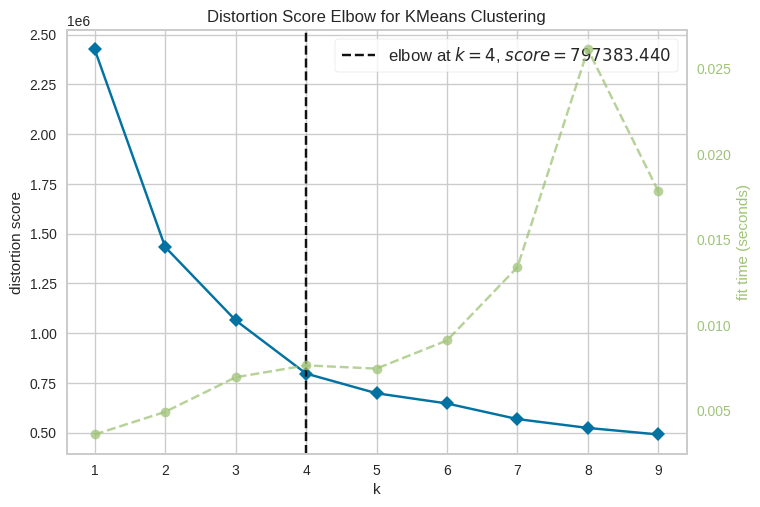

Jumlah cluster optimal: 4


In [ ]:
X = student_df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']]

# Inisialisasi model KMeans dan Elbow Visualizer
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform it
X = imputer.fit_transform(X)


# Melatih visualizer untuk menentukan jumlah cluster optimal
visualizer.fit(X)
visualizer.show()

# Menyimpan jumlah cluster optimal
optimal_clusters = visualizer.elbow_value_
print(f"Jumlah cluster optimal: {optimal_clusters}")

In [ ]:
#  Mengambil fitur penting untuk clustering
important_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']
X = student_df[important_features]

# Mengatasi missing values dengan imputasi mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Inisialisasi model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=2)

# Melakukan clustering
cluster_labels = kmeans.fit_predict(X_scaled)

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Membuat DataFrame baru dengan fitur penting dan label cluster
result_df = pd.DataFrame(X, columns=important_features)
result_df['Cluster'] = cluster_labels

# Menampilkan hasil clustering (5 data teratas)
print("\nHasil Clustering (5 data teratas):")
result_df

Silhouette Score: 0.1433

Hasil Clustering (5 data teratas):


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Cluster
0,23,84,7,73,0,0
1,19,64,8,59,2,3
2,24,98,7,91,2,2
3,29,89,8,98,1,1
4,19,92,6,65,3,2
...,...,...,...,...,...,...
6602,25,69,7,76,1,1
6603,23,76,8,81,3,1
6604,20,90,6,65,3,2
6605,10,86,6,91,2,2


In [ ]:
print(f"Silhouette Score 1: {sil_score:}")
print(f"Silhouette Score2 : {silhouette_avg:}")

Silhouette Score 1: 0.30038830586869913
Silhouette Score2 : 0.14334762237189397


**insight**:
- dari skor silhoutee yang terbaik adalah yang sebelum menerapkan feature selection

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

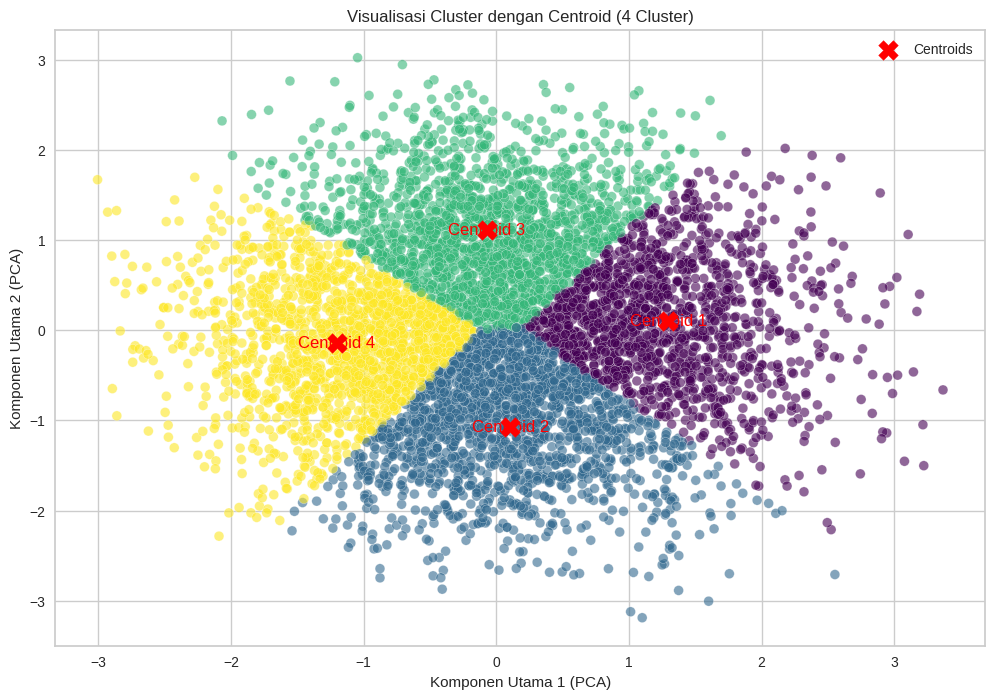

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Mengubah data menjadi 2 dimensi dengan PCA sebelum clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Melakukan clustering pada data hasil PCA
kmeans = KMeans(n_clusters=optimal_clusters, random_state=2)
cluster_labels = kmeans.fit_predict(X_pca)

# Mendapatkan posisi centroid hasil PCA
centroids_pca = kmeans.cluster_centers_

# Visualisasi clustering
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title(f'Visualisasi Cluster dengan Centroid ({optimal_clusters} Cluster)')
plt.xlabel('Komponen Utama 1 (PCA)')
plt.ylabel('Komponen Utama 2 (PCA)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
clustering = student_df.copy()

# Mengembalikan data Binary Encoding (One-Hot Encoding dengan drop_first=True)
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities',
               'Gender', 'School_Type']

for col in binary_cols:
    encoded_cols = [c for c in clustering.columns if c.startswith(col + '_')]
    if encoded_cols:
        clustering[col] = clustering[encoded_cols].idxmax(axis=1).str.split('_').str[-1]
        clustering.drop(columns=encoded_cols, inplace=True)

# Mengembalikan data Multi-Kategori (One-Hot Encoding)
multi_cat_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                  'Family_Income', 'Teacher_Quality', 'Peer_Influence',
                  'Parental_Education_Level', 'Distance_from_Home']

for col in multi_cat_cols:
    encoded_cols = [c for c in clustering.columns if c.startswith(col + '_')]
    if encoded_cols:
        clustering[col] = clustering[encoded_cols].idxmax(axis=1).str.split('_').str[-1]
        clustering.drop(columns=encoded_cols, inplace=True)

# Menampilkan hasil
clustering.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Cluster,Extracurricular_Activities,Internet_Access,...,Gender,School_Type,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Peer_Influence,Parental_Education_Level,Distance_from_Home
0,23,84,7,73,0,3,67,0,Yes,Yes,...,Male,Public,Low,High,Low,Low,Medium,Positive,High School,Near
1,19,64,8,59,2,4,61,2,Yes,Yes,...,Male,Public,Low,Medium,Low,Medium,Medium,Negative,College,Moderate
2,24,98,7,91,2,4,74,3,Yes,Yes,...,Male,Public,Medium,Medium,Medium,Medium,Medium,Neutral,Postgraduate,Near
3,29,89,8,98,1,4,71,3,Yes,Yes,...,Male,Public,Low,Medium,Medium,Medium,Medium,Negative,High School,Moderate
4,19,92,6,65,3,4,70,0,Yes,Yes,...,Male,Public,Medium,Medium,Medium,Medium,High,Neutral,College,Near


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Tidak melakukan normalisasi

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
print(student_df['Cluster'].value_counts())

Cluster
0    1640
2    1613
1    1602
3    1523
Name: count, dtype: int64


In [ ]:
for cluster_id in range(optimal_clusters):
    print(f"\nCluster {cluster_id + 1} (Jumlah: {(student_df['Cluster'] == cluster_id).sum()} siswa):")
    print(student_df[student_df['Cluster'] == cluster_id].mean(numeric_only=True))


Cluster 1 (Jumlah: 1640 siswa):
Hours_Studied                            19.785976
Attendance                               90.226220
Sleep_Hours                               7.053659
Previous_Scores                          62.876220
Tutoring_Sessions                         1.540244
Physical_Activity                         2.931707
Exam_Score                               68.605488
Extracurricular_Activities_Yes            0.590854
Internet_Access_Yes                       0.923171
Learning_Disabilities_Yes                 0.099390
Gender_Male                               0.573171
School_Type_Public                        0.683537
Parental_Involvement_High                 0.300000
Parental_Involvement_Low                  0.200000
Parental_Involvement_Medium               0.500000
Access_to_Resources_High                  0.280488
Access_to_Resources_Low                   0.217073
Access_to_Resources_Medium                0.502439
Motivation_Level_High                     0.19024

1. Cluster 1 (Jumlah: 1640 siswa):
Hours_Studied                            19.785976
Attendance                               90.226220
Sleep_Hours                               7.053659
Previous_Scores                          62.876220
Tutoring_Sessions                         1.540244
Physical_Activity                         2.931707
Exam_Score                               68.605488
Extracurricular_Activities_Yes            0.590854
Internet_Access_Yes                       0.923171
Learning_Disabilities_Yes                 0.099390
Gender_Male                               0.573171
School_Type_Public                        0.683537
Parental_Involvement_High                 0.300000
Parental_Involvement_Low                  0.200000
Parental_Involvement_Medium               0.500000
Access_to_Resources_High                  0.280488
Access_to_Resources_Low                   0.217073
Access_to_Resources_Medium                0.502439
Motivation_Level_High                     0.190244
Motivation_Level_Low                      0.289024
Motivation_Level_Medium                   0.520732
Family_Income_High                        0.196951
Family_Income_Low                         0.396951
Family_Income_Medium                      0.406098
Teacher_Quality_High                      0.311585
Teacher_Quality_Low                       0.092683
Teacher_Quality_Medium                    0.595732
Peer_Influence_Negative                   0.199390
Peer_Influence_Neutral                    0.398171
Peer_Influence_Positive                   0.402439
Parental_Education_Level_College          0.315244
Parental_Education_Level_High School      0.479878
Parental_Education_Level_Postgraduate     0.204878
Distance_from_Home_Far                    0.092683
Distance_from_Home_Moderate               0.300000
Distance_from_Home_Near                   0.607317
Cluster                                   0.000000
dtype: float64

2. Cluster 2 (Jumlah: 1602 siswa):
Hours_Studied                            19.866417
Attendance                               70.113608
Sleep_Hours                               7.049313
Previous_Scores                          87.755930
Tutoring_Sessions                         1.454432
Physical_Activity                         2.968789
Exam_Score                               65.796504
Extracurricular_Activities_Yes            0.611111
Internet_Access_Yes                       0.928215
Learning_Disabilities_Yes                 0.110487
Gender_Male                               0.569913
School_Type_Public                        0.700999
Parental_Involvement_High                 0.288390
Parental_Involvement_Low                  0.210986
Parental_Involvement_Medium               0.500624
Access_to_Resources_High                  0.305243
Access_to_Resources_Low                   0.191011
Access_to_Resources_Medium                0.503745
Motivation_Level_High                     0.213483
Motivation_Level_Low                      0.287765
Motivation_Level_Medium                   0.498752
Family_Income_High                        0.184145
Family_Income_Low                         0.395131
Family_Income_Medium                      0.420724
Teacher_Quality_High                      0.309613
Teacher_Quality_Low                       0.102996
Teacher_Quality_Medium                    0.587391
Peer_Influence_Negative                   0.205993
Peer_Influence_Neutral                    0.392634
Peer_Influence_Positive                   0.401373
Parental_Education_Level_College          0.297753
Parental_Education_Level_High School      0.518727
Parental_Education_Level_Postgraduate     0.183521
Distance_from_Home_Far                    0.101124
Distance_from_Home_Moderate               0.293383
Distance_from_Home_Near                   0.605493
Cluster                                   1.000000
dtype: float64

3. Cluster 3 (Jumlah: 1613 siswa):
Hours_Studied                            19.915065
Attendance                               70.146311
Sleep_Hours                               7.073776
Previous_Scores                          62.814011
Tutoring_Sessions                         1.477991
Physical_Activity                         3.034098
Exam_Score                               64.648481
Extracurricular_Activities_Yes            0.599504
Internet_Access_Yes                       0.924985
Learning_Disabilities_Yes                 0.106634
Gender_Male                               0.585865
School_Type_Public                        0.696218
Parental_Involvement_High                 0.278983
Parental_Involvement_Low                  0.190329
Parental_Involvement_Medium               0.530688
Access_to_Resources_High                  0.301922
Access_to_Resources_Low                   0.208308
Access_to_Resources_Medium                0.489771
Motivation_Level_High                     0.197148
Motivation_Level_Low                      0.305022
Motivation_Level_Medium                   0.497830
Family_Income_High                        0.205828
Family_Income_Low                         0.406076
Family_Income_Medium                      0.388097
Teacher_Quality_High                      0.272164
Teacher_Quality_Low                       0.098574
Teacher_Quality_Medium                    0.629262
Peer_Influence_Negative                   0.220087
Peer_Influence_Neutral                    0.367018
Peer_Influence_Positive                   0.412895
Parental_Education_Level_College          0.315561
Parental_Education_Level_High School      0.489151
Parental_Education_Level_Postgraduate     0.195288
Distance_from_Home_Far                    0.109733
Distance_from_Home_Moderate               0.321141
Distance_from_Home_Near                   0.569126
Cluster                                   2.000000
dtype: float64

4. Cluster 4 (Jumlah: 1523 siswa):
Hours_Studied                            20.365069
Attendance                               89.910703
Sleep_Hours                               6.958634
Previous_Scores                          87.820749
Tutoring_Sessions                         1.508207
Physical_Activity                         2.956008
Exam_Score                               70.082731
Extracurricular_Activities_Yes            0.585686
Internet_Access_Yes                       0.919238
Learning_Disabilities_Yes                 0.102429
Gender_Male                               0.584373
School_Type_Public                        0.700591
Parental_Involvement_High                 0.283651
Parental_Involvement_Low                  0.208798
Parental_Involvement_Medium               0.507551
Access_to_Resources_High                  0.304662
Access_to_Resources_Low                   0.181221
Access_to_Resources_Medium                0.514117
Motivation_Level_High                     0.200263
Motivation_Level_Low                      0.286934
Motivation_Level_Medium                   0.512804
Family_Income_High                        0.183848
Family_Income_Low                         0.422193
Family_Income_Medium                      0.393959
Teacher_Quality_High                      0.301379
Teacher_Quality_Low                       0.112278
Teacher_Quality_Medium                    0.586343
Peer_Influence_Negative                   0.208798
Peer_Influence_Neutral                    0.407748
Peer_Influence_Positive                   0.383454
Parental_Education_Level_College          0.286277
Parental_Education_Level_High School      0.493762
Parental_Education_Level_Postgraduate     0.219961
Distance_from_Home_Far                    0.095207
Distance_from_Home_Moderate               0.302692
Distance_from_Home_Near                   0.602101
Cluster                                   3.000000
dtype: float64

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Hours Studied, Attendance, dan Sleep Hours berada di tingkat rata-rata,menunjukkan siswa dengan rutinitas belajar yang cukup teratur.

- Previous Scores dan Exam Scores relatif rendah, kemungkinan terdapat kendala pemahaman materi atau lingkungan belajar yang kurang mendukung.

- Partisipasi dalam Extracurricular Activities cukup tinggi, tetapi mayoritas memiliki Learning Disabilities.

- Parental Involvement dan Access to Resources berada di tingkat medium, menunjukkan dukungan orang tua yang cukup tetapi tidak optimal.

- Tingkat Motivation cenderung sedang hingga rendah, yang dapat memengaruhi performa akademis.

- Sebagian besar berasal dari keluarga dengan pendapatan rendah hingga sedang.

- Peer Influence sebagian besar netral dan positif

- Parental Education Level lebih banyak pada tingkat SMA, yang bisa menjadi salah satu faktor kurangnya dukungan akademis.

- Mayoritas tinggal dekat dengan sekolah, sehingga masalah jarak bukan kendala besar.

- Analisis : Cluster ini terdiri dari siswa yang memiliki potensi akademis tetapi mungkin memerlukan dukungan lebih dalam pembelajaran, baik dari guru, orang tua, maupun lingkungan sekitar.

## Cluster 2:
- Jam belajar dan kehadiran sekolah cukup tinggi, tetapi skor ujian dan nilai sebelumnya lebih tinggi dari Cluster 1.

- Tingkat Motivation Level lebih tinggi, mencerminkan semangat belajar yang baik.

- Sebagian besar siswa memiliki Internet Access yang memadai

- Teacher Quality dinilai cukup baik, namun masih ada beberapa yang kurang memadai.

- Family Income cenderung rendah hingga menengah.

- Pengaruh teman relatif positif, menunjukkan lingkungan sosial yang mendukung.

- Pendidikan orang tua cenderung lebih baik dengan tingkat perguruan tinggi yang lebih tinggi.

- Analisa: Cluster ini terdiri dari siswa yang memiliki motivasi tinggi untuk belajar dan mendapatkan nilai yang cukup baik. Mereka memiliki dukungan dari lingkungan sosial yang positif, tetapi perlu dukungan finansial atau fasilitas tambahan untuk memaksimalkan potensi mereka.

## Cluster 3:

- Nilai rata-rata jam belajar, skor ujian, dan partisipasi kegiatan ekstrakurikuler cukup seimbang.

- Kehadiran di sekolah cukup tinggi, tetapi skor ujian cenderung lebih rendah dibandingkan Cluster 2.

- Tingkat motivasi lebih rendah dengan pengaruh teman yang cukup signifikan, menunjukkan kemungkinan terpengaruh oleh lingkungan sekitar.

- Akses sumber daya dan keterlibatan orang tua dalam kategori medium, menunjukkan adanya dukungan.

- Mayoritas memiliki akses internet yang cukup baik, tetapi tingkat partisipasi dalam Tutoring Sessions relatif rendah.

- Analisa : Cluster ini terdiri dari siswa dengan potensi akademis sedang, namun perlu lebih banyak dorongan motivasi dan bimbingan belajar untuk mencapai performa yang lebih baik.


## Cluster 4:
- Memiliki jam belajar, kehadiran, dan skor ujian yang tinggi — menunjukkan siswa dengan prestasi akademis yang kuat.

- Dukungan orang tua dan sumber daya yang lebih tinggi dibandingkan cluster lain, mencerminkan lingkungan belajar yang lebih mendukung.

- Mayoritas memiliki akses internet dan keterlibatan tinggi dalam kegiatan ekstrakurikuler, memberikan pengalaman belajar yang seimbang.

- Tingkat pendapatan keluarga cenderung lebih tinggi, mendukung fasilitas belajar yang lebih baik.

- Pendidikan orang tua yang lebih tinggi serta pengaruh teman yang positif juga menjadi faktor yang memperkuat performa akademis.

- Analisa: Cluster ini terdiri dari siswa berprestasi dengan dukungan lingkungan belajar yang baik. Mereka memiliki motivasi tinggi, fasilitas memadai, dan lingkungan sosial yang positif. Tantangan utama mungkin lebih kepada mempertahankan performa dan mengelola keseimbangan antara akademis dan kegiatan ekstrakurikuler.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
clustering.to_csv('hasil_clustering.csv', index=False)